<a href="https://colab.research.google.com/github/GeometricBCI/Apprenticeship-Learning-/blob/master/Gaussian_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/My Drive/Inria/fMRI_Inria"

os.chdir(path)
os.listdir(path)

Mounted at /content/drive


['cobre_X_y.pkl',
 'adnidod_X_y.pkl',
 'camcan_X_y.pkl',
 'hcp_X_y.pkl',
 'abide_X_y.pkl',
 'adni_X_y.pkl',
 '1000brains_X_y.pkl']

In [2]:
!pip install nilearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 82.6 MB/s eta 0:00:00


In [3]:
import pickle
import numpy as np

from nilearn.connectome import ConnectivityMeasure

from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

In [4]:
with open('1000brains_X_y.pkl', 'rb') as f:
  _1000brains_data = pickle.load(f)

In [5]:
_1000brains_data

{'df':      SubjectID  Session   Age Sex  \
 0            1        1  64.6   F   
 1            8        1  67.4   F   
 2           10        1  66.5   F   
 3           11        1  59.9   F   
 4           12        1  72.2   M   
 ..         ...      ...   ...  ..   
 644       1307        1  82.2   M   
 645       1309        1  58.4   M   
 646       1312        1  71.0   F   
 647       1313        1  68.5   M   
 648       1315        1  61.6   M   
 
                                             TimeSeries  ISCED_97  \
 0    [[0.6385898559, -1.488805161, -3.107653607, 1....       5.0   
 1    [[-8.692604197, -8.103249427, -10.48307563, -6...       5.0   
 2    [[-2.495836732, -2.031173377, -0.9401579453, 1...       8.0   
 3    [[4.751787655, -13.05457522, -17.09256082, -7....       9.0   
 4    [[-2.591545113, -2.546016568, 1.923840181, -1....       5.0   
 ..                                                 ...       ...   
 644  [[7.724742902, 2.07002448, 4.38555506, 5.12545.

In [6]:
_1000brains_data.keys(), _1000brains_data['atlas_name']

(dict_keys(['df', 'atlas_name']), 'Schaefer2018')

In [7]:
_1000brains_data['df']

,SubjectID,Session,Age,Sex,TimeSeries,ISCED_97,LPS_RRW(ProblemSolving),AKT_TRW(SelectiveAttention),Stroop_T3T2(Interference),RWD_5_Punkte(FiguralFluency),...,ZNS_AVW(digitspan_fw),ZNS_ARW(digitspan_bw),BNT_RT,RWT_PB2RW(PhonematicFluency),RWT_SB2RW(SemanticFluency),RWT_PGR2RW(PhonematicFluency_Switch),RWT_SSF2RW(SemanticFluency_Switch),AWST03P(Vocabulary),DemTect_Gesamt,BKW_1_5(VerbalMemory)
0,1,1,64.6,F,"[[0.6385898559, -1.488805161, -3.107653607, 1....",5.0,16.0,45.37,31.59,18.0,...,7.0,6.0,15.0,13.0,22.0,18.0,19.0,27.0,17.0,44.0
1,8,1,67.4,F,"[[-8.692604197, -8.103249427, -10.48307563, -6...",5.0,15.0,28.87,39.19,18.0,...,5.0,5.0,14.0,10.0,34.0,21.0,24.0,29.0,14.0,46.0
2,10,1,66.5,F,"[[-2.495836732, -2.031173377, -0.9401579453, 1...",8.0,19.0,41.94,21.06,35.0,...,7.0,4.0,15.0,15.0,32.0,20.0,29.0,28.0,14.0,51.0
3,11,1,59.9,F,"[[4.751787655, -13.05457522, -17.09256082, -7....",9.0,28.0,30.97,24.50,34.0,...,6.0,7.0,15.0,21.0,33.0,23.0,22.0,36.0,15.0,56.0
4,12,1,72.2,M,"[[-2.591545113, -2.546016568, 1.923840181, -1....",5.0,12.0,42.66,43.65,16.0,...,6.0,3.0,14.0,6.0,15.0,9.0,15.0,28.0,12.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1307,1,82.2,M,"[[7.724742902, 2.07002448, 4.38555506, 5.12545...",5.0,17.0,42.56,57.69,19.0,...,5.0,4.0,13.0,11.0,20.0,8.0,14.0,37.0,13.0,NaN
645,1309,1,58.4,M,"[[-4.604560184, 8.594727005, 6.566043001, 4.12...",10.0,26.0,27.72,22.88,29.0,...,7.0,5.0,15.0,23.0,25.0,19.0,26.0,35.0,18.0,46.0
646,1312,1,71.0,F,"[[-2.689662582, -3.084944665, -5.588279407, -6...",5.0,15.0,34.82,17.34,29.0,...,8.0,4.0,15.0,16.0,25.0,13.0,22.0,28.0,13.0,27.0
647,1313,1,68.5,M,"[[7.387799651, -13.21176644, -12.0597771, -15....",9.0,25.0,38.00,33.21,31.0,...,8.0,5.0,15.0,16.0,22.0,20.0,17.0,37.0,13.0,37.0


In [8]:
#default cov_estimatro = LedoitWolf with shrinkage 0.1
covariance_measure = ConnectivityMeasure(kind = "tangent",
                                         vectorize=True,
                                          )
covariance_measure.fit(_1000brains_data['df']['TimeSeries'].values)

ConnectivityMeasure(kind='tangent', vectorize=True)

In [9]:
vectorized_symmetric_matrix = covariance_measure.transform(_1000brains_data['df']['TimeSeries'].values)

In [11]:
vectorized_symmetric_matrix.shape

(649, 5050)

In [12]:
gmm = GaussianMixture(n_components=1,
                      covariance_type='full'
                      )
gmm.fit(vectorized_symmetric_matrix)

GaussianMixture()

In [13]:
print("Mean:\n", gmm.means_)
print("Covariance:\n", gmm.covariances_)

Mean:
 [[ 6.87925151e-07  8.69819362e-07 -7.06531531e-07 ... -9.05262521e-06
   2.87608613e-06 -4.62621067e-06]]
Covariance:
 [[[ 1.93684756e-01  6.17996974e-03  2.05178290e-01 ... -1.27660637e-02
   -1.03420667e-02  1.52322044e-01]
  [ 6.17996974e-03  1.28731911e-02  5.24450804e-03 ...  2.06811937e-04
    7.72325974e-05  3.67444222e-03]
  [ 2.05178290e-01  5.24450804e-03  2.97356862e-01 ... -1.64328215e-02
   -1.05599710e-02  1.74416649e-01]
  ...
  [-1.27660637e-02  2.06811937e-04 -1.64328215e-02 ...  3.32669068e-02
    5.24359711e-03 -7.27945628e-03]
  [-1.03420667e-02  7.72325974e-05 -1.05599710e-02 ...  5.24359711e-03
    3.46956814e-02  3.71050297e-03]
  [ 1.52322044e-01  3.67444222e-03  1.74416649e-01 ... -7.27945628e-03
    3.71050297e-03  1.98104231e-01]]]


In [14]:
generated_data, _ = gmm.sample(n_samples=10)

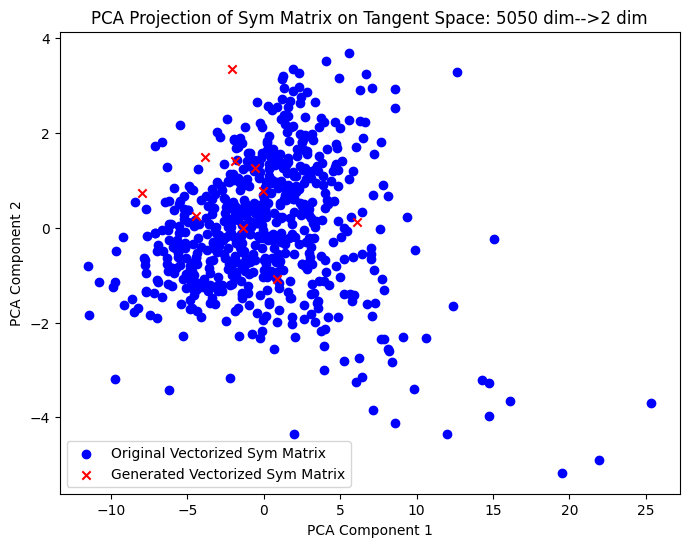

In [16]:
pca = PCA(n_components=2)
data_2d = pca.fit_transform(vectorized_symmetric_matrix)
generated_data_2d = pca.transform(generated_data)


plt.figure(figsize=(8, 6))


plt.scatter(data_2d[:, 0], data_2d[:, 1], color='blue', label='Original Vectorized Sym Matrix')
plt.scatter(generated_data_2d[:, 0], generated_data_2d[:, 1], color='red', label='Generated Vectorized Sym Matrix', marker='x')


plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Projection of Sym Matrix on Tangent Space: 5050 dim-->2 dim')


plt.legend()
plt.show()

In [17]:
generated_cov = covariance_measure.inverse_transform(generated_data)

In [18]:
generated_cov.shape

(10, 100, 100)

In [25]:
original_cov = covariance_measure.inverse_transform(vectorized_symmetric_matrix)

In [26]:
original_cov[0]

array([[ 24.74938543,   4.06505281,  -1.97727237, ...,   1.5500677 ,
         58.94365796,  11.96539671],
       [  4.06505281,  14.49952988,   9.28011468, ..., -18.65571143,
         -0.96179141, -15.74690745],
       [ -1.97727237,   9.28011468,  15.71205341, ..., -40.3166531 ,
        -30.64057714, -41.96371258],
       ...,
       [  1.5500677 , -18.65571143, -40.3166531 , ..., 233.28981475,
        109.17887604, 208.1562811 ],
       [ 58.94365796,  -0.96179141, -30.64057714, ..., 109.17887604,
        264.56578841, 124.38575194],
       [ 11.96539671, -15.74690745, -41.96371258, ..., 208.1562811 ,
        124.38575194, 285.24909015]])

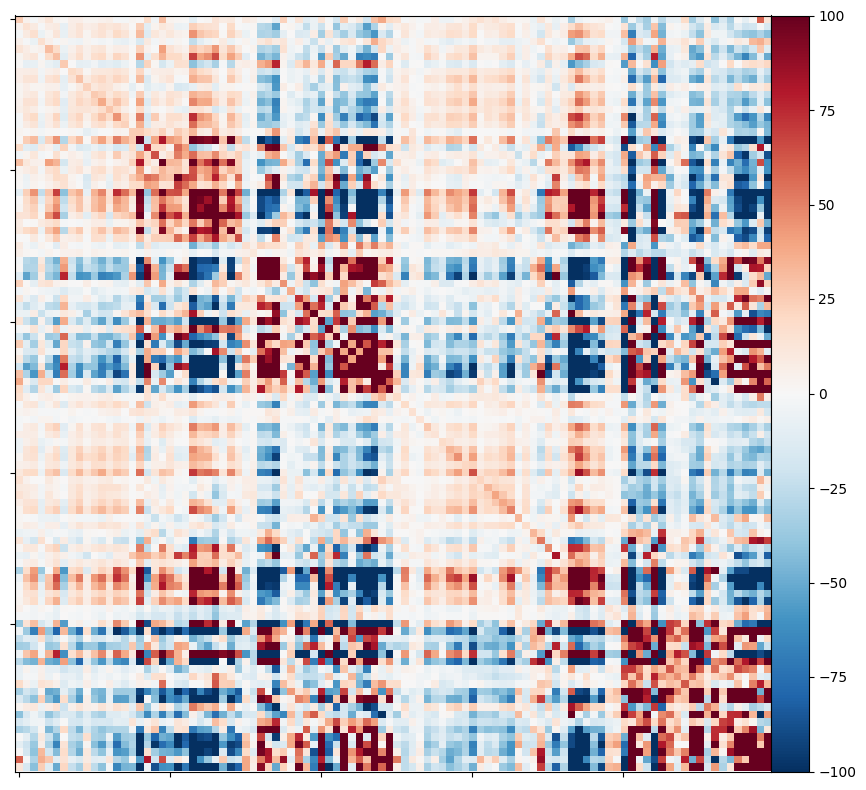

In [30]:
from nilearn import plotting

plotting.plot_matrix(original_cov[0],
                     figure=(10, 8),
                     colorbar=True,
                     vmax=100,
                     vmin=-100)

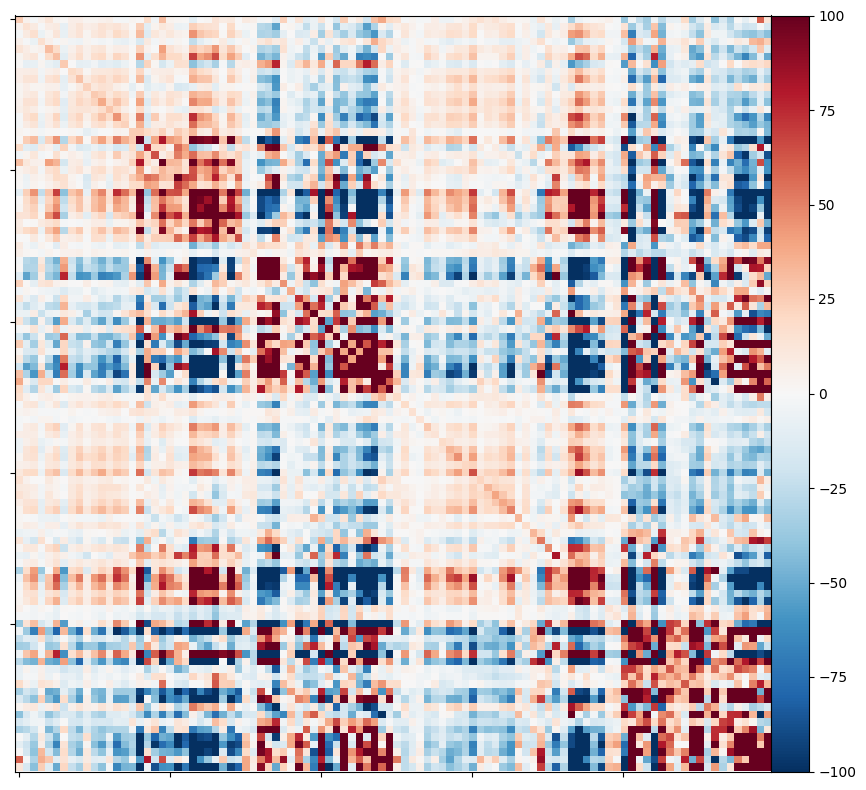

In [31]:
plotting.plot_matrix(original_cov[0],
                     figure=(10, 8),
                     colorbar=True,
                     vmax=100,
                     vmin=-100)